In [1]:
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv
import json
import os
import random

In [9]:
def flatten_matrix(data, *args):
    flattened_array = []
    labels = []
    for i in range(5):
        for j in range(5):
            if i<j-1:
                flattened_array.append(data[i,j])
    return flattened_array

In [ ]:
correlation_values = pd.DataFrame(columns=['r', 'p'])  
PATH = './output/india/random-check/'
files = os.listdir(path=PATH)

answers = pd.DataFrame({'r':[], 'p':[]})

for i in range(200):
    user_a, user_b = random.choices(files, k=2)
    data_x = pd.read_csv(os.path.join(PATH, user_a)).to_numpy()
    x = flatten_matrix(data_x)

    data_y = pd.read_csv(os.path.join(PATH, user_b)).to_numpy()
    y = flatten_matrix(data_y)

    corr = sp.pearsonr(x, y)
    answers.loc[len(answers)]=corr


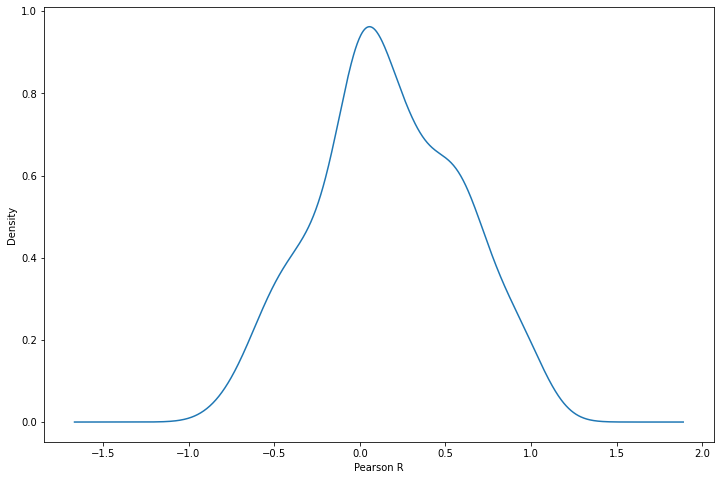

In [ ]:
answers = answers.fillna(0)
plt.figure(figsize=(12,8))
plt.xlabel('Pearson R')
answers['r'].plot(kind='kde')
plt.savefig('./figs/randomized-correlation-plot.png')

## Randomly Sample only two Indian Participants N times

In [6]:
NUM_PERM = 200

In [55]:
# shuffle one of the two arrays with n permutations
def permutations(a, b, statistic, n):
    p_values = []
    for i in range(n):
        c = random.sample(b, len(b))
        if(len(a)==len(c)):
            r, p = sp.pearsonr(a,c)
            if(r>statistic):
                p_values.append(p)
        else:
            print("Error! array lengths are not the same")
            return
    return p_values

In [4]:
def flatten_distance_matrix(numpy_array, *args):
    arr = []
    labels = []
    for i in range(5):
        for j in range(5):
            if i<j:
                arr.append(numpy_array[i,j])
                labels.append(str(args[0]*5+i)+","+str(args[0]*5+j))
    return arr, labels

In [131]:
def get_japanese_pairwise():
    PATH = './output/japan/similarity/'
    japanese_pairwise = []
    for i in range(6):
        npar = pd.read_csv(PATH+str(i)+'_average_distance.csv').to_numpy()
        x,y = flatten_distance_matrix(npar, i)
        japanese_pairwise.extend(x)
    japanese_pairwise = [x/100 for x in japanese_pairwise]
    return japanese_pairwise

In [169]:
def get_indian_pairwise():
    PATH = './output/india/pairwise/'
    sampling = {
        0: 'full_north_musician',
        1: 'full_south_musician',
        2: 'full_north_non',
        3: 'full_south_non'
    }

    indian_pairwise = []
    labels = []

    group_1 = sampling[round(random.random()*3)]+'.csv'
    group_2 = sampling[round(random.random()*3)]+'.csv'
    for i in range(6):
        npar_1 = pd.read_csv(PATH+group_1).to_numpy()
        npar_2 = pd.read_csv(PATH+group_2).to_numpy()
        npar = (npar_1+npar_2)/2
        x,y = flatten_distance_matrix(npar[i*5:(i*5)+5, i*5:(i*5)+5], i)
        indian_pairwise.extend(x)
        labels.extend(y)
    indian_pairwise = [1- (x / 100) for x in indian_pairwise]
    return indian_pairwise

In [170]:
def run_random_sampling(df):
    ## Japan vs India Correlation
    a = get_japanese_pairwise()
    b = get_indian_pairwise()
    n = 1000
    r, p = sp.pearsonr(a,b)
    statistic = r
    results = permutations(list(a),list(b),statistic, n)
    Sum_p = sum(results)
    sig = (Sum_p+1)/(n+1)
    # Because signif <- (sum(perm >= statistic - EPS) + 1)/(permutations + 1)
    df = pd.concat([df, pd.DataFrame([{"r":r,"sig":sig}])])
    return df

In [171]:
df = pd.DataFrame(columns=["r","sig"])
for i in range(NUM_PERM):
    df = run_random_sampling(df)

In [167]:
df.to_csv('./output/analysis/random_sample.csv', index=0)

<AxesSubplot:xlabel='Pearson R', ylabel='Density'>

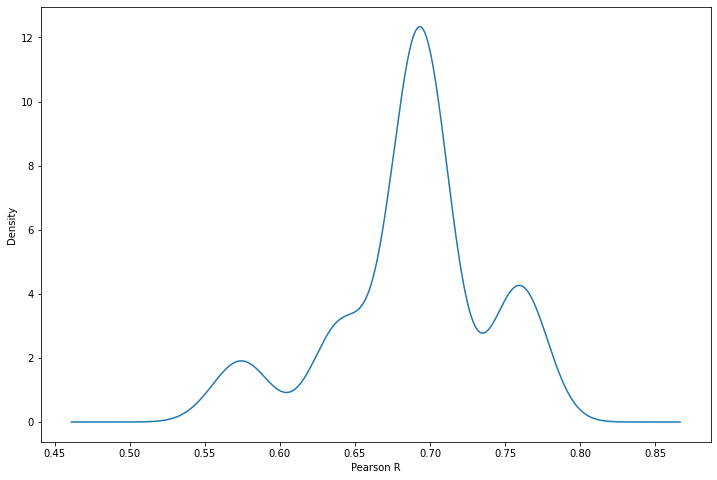

In [172]:
plt.figure(figsize=(12,8))
plt.xlabel('Pearson R')
df['r'].plot(kind='kde')